In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Loading NASA datasets metadata

In [2]:
df=pd.read_csv('key_metadata.csv')
df.head()

,Unnamed: 0,title,theme,key_words,url
0,0,ROSETTA-ORBITER EARTH RPCMAG 2 EAR2 RAW V3.0,earth science,"unknown,earth,international rosetta mission",https://pds.nasa.gov/ds-view/pds/viewDataset.j...
1,1,"Sealed Planetary Return Canister (SPRC), Phase II",NaN,"jet propulsion laboratory,completed",https://techport.nasa.gov/view/9532
2,2,Enhanced ORCA and CLARREO Depolarizers Using A...,NaN,"completed,goddard space flight center",https://techport.nasa.gov/view/9174
3,3,GPM SSMIS on F17 (GPROF) Climate-based Radiome...,"gpm,geospatial","earth science,atmosphere,atmospheric water vap...",https://doi.org/10.5067/GPM/SSMIS/F17/GPROFCLI...
4,4,NEAR EROS RADIO SCIENCE DATA SET - EROS/ORBIT ...,earth science,"near earth asteroid rendezvous,eros",https://pds.nasa.gov/ds-view/pds/viewDataset.j...


# Cleaning metdata

In [11]:
themes=[]
for  tm in df['theme']:
    if type(tm)==str:
        for th in tm.split(','):
            themes.append(th.replace('"',''))
    else:
        themes.append('Undefined')      
themes=list(set(themes))

temas=pd.DataFrame({'themes':themes})
temas.to_csv('themes.csv')

# Loading NASA datasets themes

In [80]:
df=pd.read_csv('themes.csv')
documents=[]
for i,th in enumerate(df['themes'].to_list()):
    if  'malaysia' in th:
        documents.append(i)

In [83]:
sims=pd.read_csv('nasa_similarity.csv')
sims.head()

,Unnamed: 0,edge_start,edge_end
0,0,0,876
1,1,0,1364
2,2,0,2634
3,3,0,4219
4,4,1,2689


# Loadin relations netween datasets

In [84]:
edges=sims[sims['edge_start'].isin(documents)]
edges

,Unnamed: 0,edge_start,edge_end
11679,11679,218,2436
11680,11680,218,3924
11681,11681,218,5642
11682,11682,218,5999
11683,11683,218,6277
...,...,...,...
34533,34533,584,9815
34534,34534,584,9834
34535,34535,584,9956
34536,34536,584,9957


In [86]:
G=nx.Graph()
for x,y in zip(edges['edge_start'],edges['edge_end']):
    G.add_edge(x,y)

In [87]:
pos=nx.random_layout(G)

# Drawing Relations

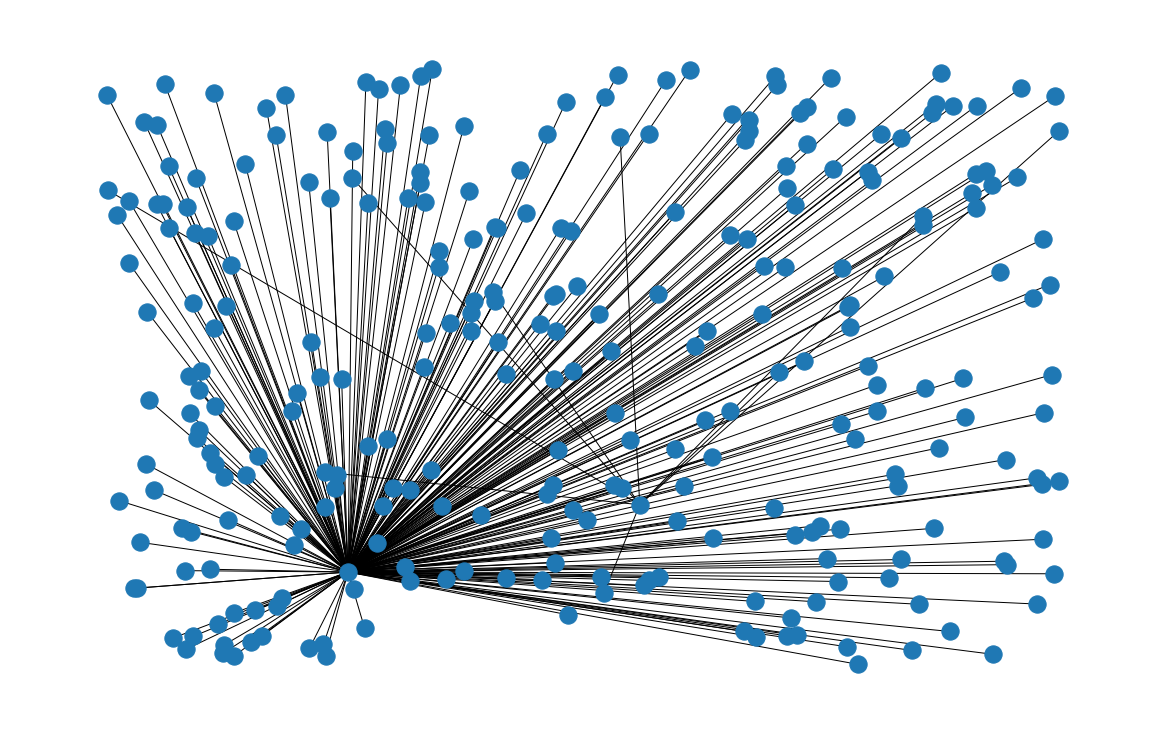

In [88]:
plt.figure(figsize=(16,10))
nx.draw(G,pos=pos)